# Min Max Average Percent

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import glob

In [5]:
deped12 = pd.read_csv("deped_publicsecondaryenrollment2012.csv",engine = 'python',index_col = 0)
deped15 = pd.read_csv("deped_publicsecondaryenrollment2015.csv",engine = 'python',index_col = 0)
deped12 = deped12.dropna()
deped15 = deped15.dropna()

deped1215 = pd.merge(deped12,deped15,left_on= ['school_id','year_level','gender'],right_on=['school_id','year_level','gender'])
deped1215 = deped1215.rename(columns={'school_name_x':'school_name',
                                      'region_x':'region',
                                      'province_x':'province',
                                      'division_x':'division',
                                      'municipality_x':'municipality',
                                      'enrollment_x':'enrollment2012',
                                      'enrollment_y':'enrollment2015'})

deped1215 = deped1215.drop(columns =['school_name_y','region_y','municipality_y','province_y','division_y'])

deped1215['enrollment2012']= pd.to_numeric(deped1215['enrollment2012'])
deped1215['enrollment2015']= pd.to_numeric(deped1215['enrollment2015'])

# School ID (deped_id)

In [17]:
#GROUPED BY SCHOOL ID
deped_id = deped1215.groupby(['school_id']).sum()

deped_id['percent']=((deped_id['enrollment2015']-deped_id['enrollment2012'])/deped_id['enrollment2012'])*100
deped_id = deped_id.sort_values('percent',ascending =False)

print("Minimum: ",deped_id['percent'].min())
print("Maximum: ",deped_id['percent'].max())
print("Average: ",deped_id['percent'].sum()/len(deped_id['percent']))

deped_id.tail()

Minimum:  -96.1038961038961
Maximum:  1419.230769230769
Average:  14.432205763930346


,enrollment2012,enrollment2015,percent
school_id,,,
318504,337.0,68,-79.821958
305057,344.0,36,-89.534884
305061,445.0,45,-89.887640
300193,2651.0,137,-94.832139
318247,308.0,12,-96.103896


# By Region (deped_region)

Minimum:  -13.485628421804332
Maximum:  12.647387938927062
Average:  5.167241900102244


,region,enrollment2012,enrollment2015,percent
0,ARMM (Autonomous Region in Muslim Mindanao),134432.0,116303,-13.485628
1,NCR (National Capital Region),594421.0,581120,-2.237640
2,II (Cagayan Valley),168919.0,171404,1.471119
3,I (Ilocos Region),266541.0,275238,3.262913
4,VI (Western Visayas),408832.0,426670,4.363161
5,III (Central Luzon),525861.0,553545,5.264509
6,CAR (Cordillera Administrative Region),76119.0,80242,5.416519
7,IV-B (MIMAROPA),168828.0,178695,5.844410
8,IV-A (CALABARZON),643017.0,684455,6.444309
9,VIII (Eastern Visayas),260408.0,278540,6.962920


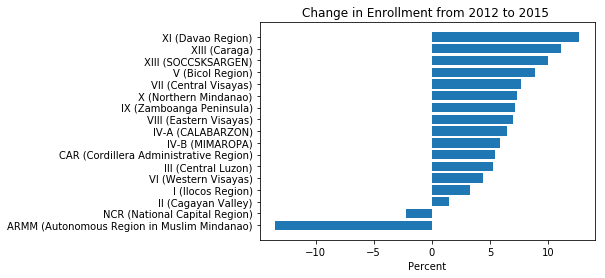

In [97]:
#GROUPED BY REGION
deped_region = deped1215.groupby(['region']).sum()

deped_region['percent']=((deped_region['enrollment2015']-deped_region['enrollment2012'])/deped_region['enrollment2012'])*100
deped_region = deped_region.sort_values('percent',ascending =False)

print("Minimum: ",deped_region['percent'].min())
print("Maximum: ",deped_region['percent'].max())
print("Average: ",deped_region['percent'].sum()/len(deped_region['percent']))

deped_region = deped_region.sort_values('percent')
deped_region = deped_region.reset_index()

objects = deped_region['region']
y_pos = np.arange(len(objects))
x_pos = deped_region['percent']

plt.barh(y_pos,x_pos, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Percent')
plt.title('Change in Enrollment from 2012 to 2015')
deped_region

# r for latitude vs enrollment (2015 data only)

In [19]:
deped_lat = deped15

deped_lat['enrollment']= pd.to_numeric(deped_lat['enrollment'])
deped_lat['latitude']= pd.to_numeric(deped_lat['latitude'],errors='coerce')

deped_lat = deped_lat.dropna(subset=['latitude'])

deped_lat = deped_lat.groupby(['school_id','latitude']).sum()
deped_lat = deped_lat.reset_index()
deped_lat = deped_lat.set_index('school_id')

deped_lat.head()

,latitude,enrollment
school_id,,
300001,18.458590,118
300002,18.249772,1992
300003,18.535673,629
300004,17.980353,334
300005,18.110750,513


**Obtaining the correlation coefficient (r)**

r for Enrollment vs. latitude: 0.08191990397803477


Text(0, 0.5, 'Latitude')

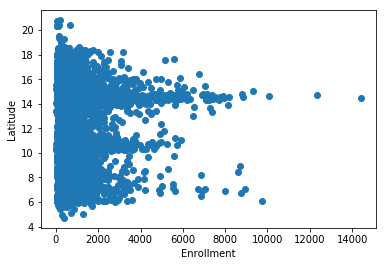

In [128]:
x = deped_lat['enrollment']
y = deped_lat['latitude']
n = len(deped_lat['enrollment'])

r_up = (n*(x*y).sum())-(x.sum()*y.sum())
r_down_left = (n*(x**2).sum())-((x.sum())**2)
r_down_right = (n*(y**2).sum())-((y.sum())**2)
r_down = math.sqrt(r_down_left*r_down_right)
r = r_up/r_down

print("r for Enrollment vs. latitude:", r)
plt.scatter(x,y)
plt.xlabel('Enrollment')
plt.ylabel('Latitude')

# by Municipality (deped_mun)

In [64]:
deped_mun = deped1215.groupby(['region','municipality']).sum()
deped_mun = deped_mun.reset_index().set_index('municipality')
deped_mun['percent'] = ((deped_mun['enrollment2015']-deped_mun['enrollment2012'])/deped_mun['enrollment2012'])*100
deped_mun = deped_mun.sort_values('percent', ascending = False)


# Income Livelihood Indicators(Leyte)

In [87]:
path = "C:\\Users\\Acer\\Documents\\01 Eskwelabs\\Hackathon1 Data CBMS\\Leyte_CBMS\\cbms_leyte_income_livelihood_indicators.csv"
    
leyte_income = pd.read_csv(path ,engine = 'python',index_col = 0)

leyte_income = leyte_income.drop(columns =['population_male_magnitude','population_female_magnitude',
                                           'population_male_proportion','population_female_proportion',
                                           'population_total_magnitude'])
leyte_income ['household_magnitude']= pd.to_numeric(leyte_income ['household_magnitude'],errors='coerce')
leyte_income ['household_proportion']= pd.to_numeric(leyte_income ['household_proportion'],errors='coerce')
leyte_income ['household_total']= pd.to_numeric(leyte_income ['household_total'],errors='coerce')

leyte_income  = leyte_income.dropna(subset=['household_magnitude','household_proportion','household_total'])
leyte_income = leyte_income.loc[leyte_income['household_proportion'] != 0]

leyte_income = leyte_income.groupby(['city_or_municipality','income_and_livelihood']).agg({'household_magnitude':'sum',
      'household_proportion':'mean',
      'household_total':'sum'})

leyte_income = leyte_income.reset_index()

leyte_income.head()

,city_or_municipality,income_and_livelihood,household_magnitude,household_proportion,household_total
0,Albuera,households experienced food shortage,515,9.823077,2534
1,Albuera,households with income below food threshold,5290,66.212500,23484
2,Albuera,households with income below poverty threshold,5953,75.000000,26261
3,Albuera,unemployed members of the labor force,1841,33.218750,2605
4,Babatngon,households experienced food shortage,253,15.380000,1287


In [89]:
deped_leyte_income = pd.merge(leyte_income,deped_mun,left_on ='city_or_municipality',right_on='municipality')
deped_leyte_income.head()

,city_or_municipality,income_and_livelihood,household_magnitude,household_proportion,household_total,region,enrollment2012,enrollment2015,percent
0,Albuera,households experienced food shortage,515,9.823077,2534,VIII (Eastern Visayas),2496.0,2665,6.770833
1,Albuera,households with income below food threshold,5290,66.212500,23484,VIII (Eastern Visayas),2496.0,2665,6.770833
2,Albuera,households with income below poverty threshold,5953,75.000000,26261,VIII (Eastern Visayas),2496.0,2665,6.770833
3,Albuera,unemployed members of the labor force,1841,33.218750,2605,VIII (Eastern Visayas),2496.0,2665,6.770833
4,Babatngon,households experienced food shortage,253,15.380000,1287,VIII (Eastern Visayas),1681.0,1754,4.342653


# Crime

In [129]:
import glob

path = r'C:\Users\Acer\Documents\01 Eskwelabs\Hackathon1 Data CBMS\00 Peace' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

crime = pd.concat(li, axis=0, ignore_index=True)

crime = crime.drop(columns =['demography','peace_and_safety','population_female_magnitude',
                             'population_female_proportion','population_male_magnitude',
                             'population_male_proportion','population_total_magnitude'])

crime = crime.loc[crime['households_total'] != 0]
crime = crime.groupby(['city_or_municipality','region']).agg({'households_magnitude':'sum',
      'households_proportion':'mean',
      'households_total':'sum'})

crime = crime.reset_index()

crime.head()

C:\Users\Acer\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


,city_or_municipality,region,households_magnitude,households_proportion,households_total
0,Abra de Ilog,IV-B (MIMAROPA),38,1.000000,75
1,Albuera,VIII (Eastern Visayas),51,1.514286,70
2,Aurora,IX (Zamboanga Peninsula),22,1.737500,27
3,Babatngon,VIII (Eastern Visayas),10,0.880000,13
4,Bayog,IX (Zamboanga Peninsula),8,1.275000,11


**Merge crim and deped_mun**

In [130]:
deped_crime = pd.merge(crime,deped_mun,left_on =['city_or_municipality','region'],right_on=['municipality','region'])
deped_crime.sort_values('percent')
deped_crime.head()

,city_or_municipality,region,households_magnitude,households_proportion,households_total,enrollment2012,enrollment2015,percent
0,Abra de Ilog,IV-B (MIMAROPA),38,1.000000,75,1216.0,1447,18.996711
1,Albuera,VIII (Eastern Visayas),51,1.514286,70,2496.0,2665,6.770833
2,Aurora,IX (Zamboanga Peninsula),22,1.737500,27,2577.0,2564,-0.504463
3,Babatngon,VIII (Eastern Visayas),10,0.880000,13,1681.0,1754,4.342653
4,Bayog,IX (Zamboanga Peninsula),8,1.275000,11,1618.0,1692,4.573548


r for %Enrollment vs. Crime: -0.09790021464354777


Text(0, 0.5, 'Household Proportion (Crime)')

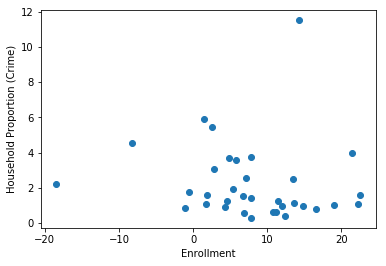

In [131]:
x = deped_crime['percent']
y = deped_crime['households_proportion']
n = len(deped_crime['percent'])

r_up = (n*(x*y).sum())-(x.sum()*y.sum())
r_down_left = (n*(x**2).sum())-((x.sum())**2)
r_down_right = (n*(y**2).sum())-((y.sum())**2)
r_down = math.sqrt(r_down_left*r_down_right)
r = r_up/r_down

print("r for %Enrollment vs. Crime:", r)
plt.scatter(x,y)
plt.xlabel('Enrollment')
plt.ylabel('Household Proportion (Crime)')

# Income and Livelihood

In [37]:
#obtain all files from income
path = r'C:\Users\Acer\Documents\01 Eskwelabs\Hackathon1 Data CBMS\00 Income and Livelihood\income' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

income = pd.concat(li, axis=0, ignore_index=True)

#from income-livelihood
path2 = r'C:\Users\Acer\Documents\01 Eskwelabs\Hackathon1 Data CBMS\00 Income and Livelihood\income-livelihood' 

all_files_2 = glob.glob(path2 + "/*.csv")

li_2 = []

for filename in all_files_2:
    df_2 = pd.read_csv(filename, index_col=None, header=0)
    li_2.append(df_2)

income_livelihood = pd.concat(li_2, axis=0, ignore_index=True)

income_livelihood = income_livelihood.drop(columns = ['households_total','population_magnitude_male',
                                                      'population_magnitude_female','population_magnitude_total',
                                                      'population_proportion_male','population_proportion_female']) 
income_livelihood.head()

,region,city_or_municipality,barangay,housing_indicators,households_magnitude,households_proportion
0,V (Bicol Region),Libmanan,Awayan,households with income below poverty threshold,204,74.7
1,V (Bicol Region),Libmanan,Awayan,households with income below food threshold,163,59.7
2,V (Bicol Region),Libmanan,Awayan,households experienced food shortage,2,0.7
3,V (Bicol Region),Libmanan,Awayan,unemployed members of the labor force,17,7.0
4,V (Bicol Region),Libmanan,Beguito Viejo,households with income below poverty threshold,137,59.8


# Income and Livelihood (poverty threshold)

In [57]:
#INCOME BELOW POVERTY

# 1
pov_thresh_1 = income.drop(columns =['barangay','households_with_income_below_the_food_threshold_magnitude',
                                     'households_with_income_below_the_food_threshold_proportion',
                                     'households_who_experienced_food_shortage_magnitude',
                                     'households_who_experienced_food_shortage_proportion'])

pov_thresh_1 = pov_thresh_1.rename(columns = {'households_with_income_below_the_poverty_threshold_magnitude':
                                              'magnitude_below_poverty_threshold',
                                              'households_with_income_below_the_poverty_threshold_proportion':
                                              'proportion_below_poverty_threshold'})

pov_thresh_1 = pov_thresh_1.loc[pov_thresh_1['proportion_below_poverty_threshold'] != 0]


# 2
pov_thresh_2 = income_livelihood[income_livelihood.housing_indicators == 'households with income below poverty threshold'] 

pov_thresh_2 = pov_thresh_2.drop(columns = ['barangay','housing_indicators']) 
pov_thresh_2 = pov_thresh_2.loc[pov_thresh_2['households_magnitude'] != 0]

pov_thresh_2 = pov_thresh_2.rename(columns = {'households_magnitude':'magnitude_below_poverty_threshold',
                                              'households_proportion':'proportion_below_poverty_threshold'})

#concatenate

below_poverty_thresh = pd.concat([pov_thresh_1,pov_thresh_2])

below_poverty_thresh = below_poverty_thresh.groupby(['city_or_municipality',
                                                     'region']).agg({'magnitude_below_poverty_threshold':'sum',
                                                                     'proportion_below_poverty_threshold':'mean'})

# Income and Livelihood (food threshold)

In [60]:
#BELOW FOOD THRESHOLD

# 1
food_thresh_1 = income.drop(columns =['barangay','households_with_income_below_the_poverty_threshold_magnitude',
                                     'households_with_income_below_the_poverty_threshold_proportion',
                                     'households_who_experienced_food_shortage_magnitude',
                                     'households_who_experienced_food_shortage_proportion'])

food_thresh_1 = food_thresh_1.rename(columns = {'households_with_income_below_the_food_threshold_magnitude':
                                              'magnitude_below_food_threshold',
                                              'households_with_income_below_the_food_threshold_proportion':
                                              'proportion_below_food_threshold'})

food_thresh_1 = food_thresh_1.loc[food_thresh_1['proportion_below_food_threshold'] != 0]


# 2
food_thresh_2 = income_livelihood[income_livelihood.housing_indicators == 'households with income below food threshold'] 

food_thresh_2 = food_thresh_2.drop(columns = ['barangay','housing_indicators'])

food_thresh_2 = food_thresh_2.loc[food_thresh_2['households_magnitude'] != 0]

food_thresh_2 = food_thresh_2.rename(columns = {'households_magnitude':'magnitude_below_food_threshold',
                                              'households_proportion':'proportion_below_food_threshold'})

#concatenate
below_food_threshold = pd.concat([food_thresh_1,food_thresh_2])

below_food_threshold

below_food_threshold = below_food_threshold.groupby(['city_or_municipality',
                                                     'region']).agg({'magnitude_below_food_threshold':'sum',
                                                                     'proportion_below_food_threshold':'mean'})


# Income and Livelihood (experience with food shortage)

In [63]:
# 1
food_short_1 = income.drop(columns =['barangay','households_with_income_below_the_poverty_threshold_magnitude',
                                     'households_with_income_below_the_poverty_threshold_proportion',
                                      'households_with_income_below_the_food_threshold_magnitude',
                                      'households_with_income_below_the_food_threshold_proportion'])
                                      

food_short_1 = food_short_1.rename(columns = {'households_who_experienced_food_shortage_magnitude':
                                              'magnitude_food_shortage',
                                              'households_who_experienced_food_shortage_proportion':
                                              'proportion_food_shortage'})

food_short_1 = food_short_1.loc[food_short_1['proportion_food_shortage'] != 0]


# 2
food_short_2 = income_livelihood[income_livelihood.housing_indicators == 'households experienced food shortage'] 

food_short_2 = food_short_2.drop(columns = ['barangay','housing_indicators'])

food_short_2 = food_short_2.loc[food_short_2['households_magnitude'] != 0]

food_short_2 = food_short_2.rename(columns = {'households_magnitude':'magnitude_food_shortage',
                                              'households_proportion':'proportion_food_shortage'})


#append both

food_shortage = pd.concat([food_short_1,food_short_2])

food_shortage = food_shortage.groupby(['city_or_municipality',
                                       'region']).agg({'magnitude_food_shortage':'sum',
                                                       'proportion_food_shortage':'mean'})